In [80]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [79]:
df=pd.read_csv('master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [7]:
""" average of each year"""
listMean=[]
for i in (df.year.unique()):
    new=df[df['year']==i]
    listMean.append(new['suicides/100k pop'].mean())

In [8]:
""" sort and Display with dataframe"""
suicidesTrend={
        "Year":df.year.unique(),
        "Mean":listMean
                }   
suicidesTrend=pd.DataFrame(suicidesTrend)
suicidesTrend.sort_values(["Year"],inplace=True)
suicidesTrend.reset_index(drop=True,inplace=True)
suicidesTrend

,Year,Mean
0,1985,11.826198
1,1986,11.423333
2,1987,11.644213
3,1988,12.709405
4,1989,12.879071
5,1990,12.862956
6,1991,13.438880
7,1992,13.498564
8,1993,13.833705
9,1994,14.073272


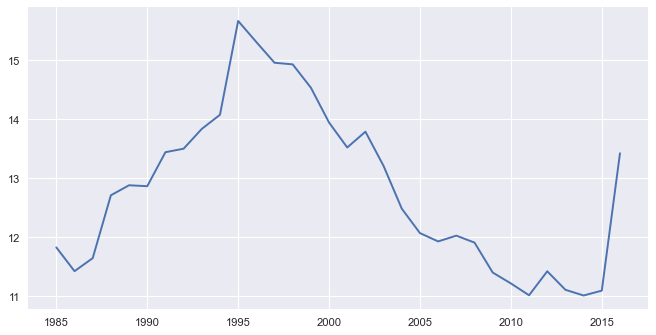

In [9]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(suicidesTrend.Year,suicidesTrend.Mean)
plt.show()


In [10]:
dfCon=pd.read_csv("countryContinent.csv")
dfCon

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,�land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,9.0,61.0
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,2.0,15.0
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


In [11]:
listCont=[]
for i in df.country.unique():
    cont=dfCon[dfCon['country']==[i][0]]['continent'].values
    listCont.append(cont)

In [12]:
""" ulkeler kitalar ile eslestirildi"""
new2=pd.DataFrame(data=listCont, index=df.country.unique())
new2

,0
Albania,Europe
Antigua and Barbuda,Americas
Argentina,Americas
Armenia,Asia
Aruba,Americas
...,...
United Arab Emirates,Asia
United Kingdom,None
United States,None
Uruguay,Americas


In [13]:
"""add new column """
Continents=[]
for i in df.country:
    Continents.append(new2[0][i])
Continents
df['Continents']=Continents

In [16]:
listCont=[]
nameCont=[]
for i in (df.Continents.unique()):
    new=df[df['Continents']==i]
    listCont.append(new['suicides/100k pop'].mean())
    nameCont.append(i)

data={
   "CONTINENTS":nameCont,
   'MEANS':listCont
}
frame=pd.DataFrame(data)
frame.dropna(inplace=True)
frame

,CONTINENTS,MEANS
0,Europe,17.815090
1,Americas,8.637922
2,Asia,9.857246
3,Oceania,11.561831
4,Africa,7.583071


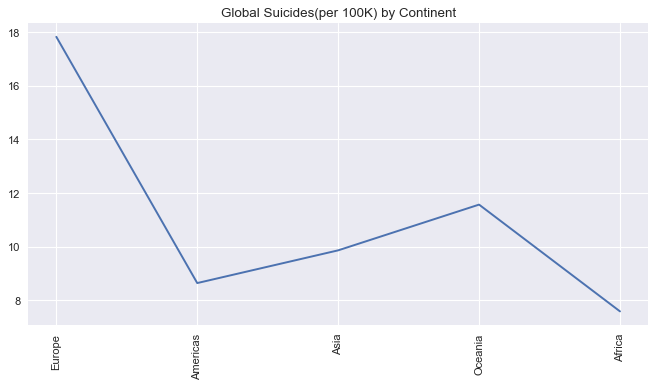

In [17]:
plt.figure(figsize=(10,5), dpi=80)
plt.plot(frame.CONTINENTS,frame.MEANS)
plt.title('Global Suicides(per 100K) by Continent')
plt.xticks(rotation = 90) 
plt.show()


In [6]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [34]:
female=df[df['sex']=='female']
data={
    'Year':female['year'],
    'Sex' : female['sex'],
    'Suicides100k':female['suicides/100k pop']
}
femdf=pd.DataFrame(data)
femdf.sort_values(["Year"],inplace=True)
femdf.reset_index(drop=True,inplace=True)
femdf
#male=df[df['sex']=='female']['suicides/100k pop']

,Year,Sex,Suicides100k
0,1985,female,0.00
1,1985,female,77.55
2,1985,female,0.00
3,1985,female,0.00
4,1985,female,0.00
...,...,...,...
13905,2016,female,0.00
13906,2016,female,6.33
13907,2016,female,5.90
13908,2016,female,9.46


In [19]:
male=df[df['sex']=='male']
data={
    'Year':male['year'],
    'Sex' : male['sex'],
    'Suicides100k':male['suicides/100k pop']
}
maledf=pd.DataFrame(data)
maledf.sort_values(["Year"],inplace=True)
maledf.reset_index(drop=True, inplace=True)
maledf

,Year,Sex,Suicides100k
0,1985,male,32.79
1,1985,male,144.65
2,1985,male,0.00
3,1985,male,0.00
4,1985,male,0.00
...,...,...,...
13905,2016,male,0.00
13906,2016,male,51.16
13907,2016,male,26.45
13908,2016,male,27.82


In [23]:
# femdf.insert(3, "Male", 'Male')
# femdf.insert(4,'Suicides100kMale', maledf.Suicides100k.values)
# femdf

,Year,Sex,Suicides100k,Male,Suicides100kMale
0,1985,female,0.00,Male,32.79
1,1985,female,77.55,Male,144.65
2,1985,female,0.00,Male,0.00
3,1985,female,0.00,Male,0.00
4,1985,female,0.00,Male,0.00
...,...,...,...,...,...
13905,2016,female,0.00,Male,0.00
13906,2016,female,6.33,Male,51.16
13907,2016,female,5.90,Male,26.45
13908,2016,female,9.46,Male,27.82


In [24]:
femdf

,Year,Sex,Suicides100k,Male,Suicides100kMale
0,1985,female,0.00,Male,32.79
1,1985,female,77.55,Male,144.65
2,1985,female,0.00,Male,0.00
3,1985,female,0.00,Male,0.00
4,1985,female,0.00,Male,0.00
...,...,...,...,...,...
13905,2016,female,0.00,Male,0.00
13906,2016,female,6.33,Male,51.16
13907,2016,female,5.90,Male,26.45
13908,2016,female,9.46,Male,27.82


In [33]:
femaleMean=[]
maleMean=[]
for i in (femdf.Year.unique()):
    new=femdf[femdf['Year']==i]
    femaleMean.append(new['Suicides100k'].mean())
    maleMean.append(new['Suicides100kMale'].mean())

[17.87548611111111,
 17.033993055555555,
 17.556296296296296,
 19.095408163265304,
 19.581314102564104,
 19.818906249999998,
 20.849791666666665,
 20.747461538461536,
 21.636153846153842,
 21.906519607843137,
 24.90525641025641,
 24.29647186147186,
 23.903982683982683,
 23.77419831223629,
 23.196305220883534,
 22.099651162790696,
 21.546344696969697,
 21.96699612403101,
 21.107655038759688,
 19.9097619047619,
 19.129285714285714,
 19.08586274509804,
 19.05666666666666,
 18.835960784313727,
 18.273333333333333,
 18.025681818181816,
 17.686375968992248,
 18.32181069958848,
 17.849708333333336,
 17.564123931623936,
 17.53467741935484,
 22.02375]

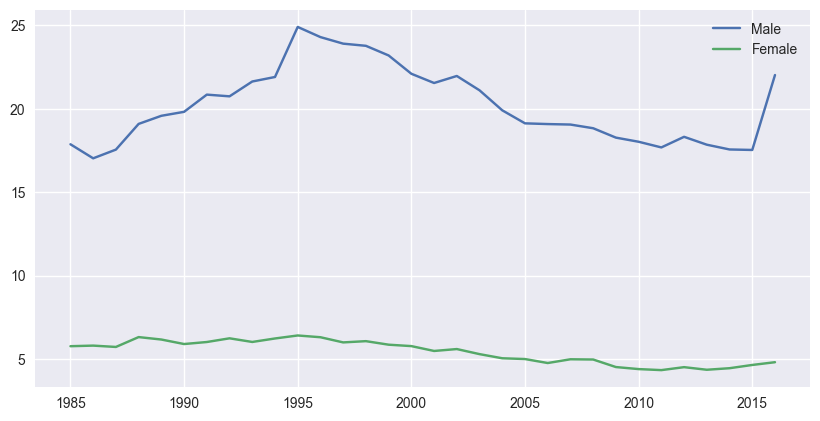

In [42]:
plt.figure(figsize=(10,5), dpi=100)
plt.style.use('seaborn') 
plt.plot(femdf.Year.unique(), maleMean, label="Male")
plt.plot(femdf.Year.unique(), femaleMean, label="Female")
plt.legend()
plt.show()

In [81]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [84]:
#
df.rename(columns={'gdp_per_capita ($)':'gdpPerCapita'},inplace=True)

In [144]:
data={
    'Population':df.population.values,
    'gdpPerCapita':df.gdpPerCapita.values,
    'suicides':df['suicides/100k pop']
    }
new3=pd.DataFrame(data)
new3.sort_values(['gdpPerCapita'])
new3.reset_index(drop=True, inplace=True)

In [145]:
new3

,Population,gdpPerCapita,suicides
0,312900,796,6.71
1,308000,796,5.19
2,289700,796,4.83
3,21800,796,4.59
4,274300,796,3.28
...,...,...,...
27815,3620833,2309,2.96
27816,348465,2309,2.58
27817,2762158,2309,2.17
27818,2631600,2309,1.67


In [170]:
f'max:{new3.gdpPerCapita.max()} min:{new3.gdpPerCapita.min()}'

'max:126352 min:251'

In [230]:
#suicide rates by income group low=<10000 medium=10000<30000, high=30000<127000
Low=new3[new3['gdpPerCapita']<=20000]['suicides']
Medium=new3[(new3["gdpPerCapita"]>20000) & (new3['Population']<=50000)]['suicides']
High=new3[(new3["gdpPerCapita"]>50000) & (new3['Population']<=127000)]['suicides']

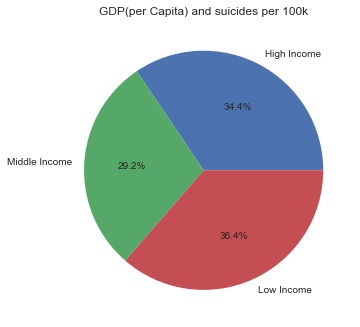

In [231]:
x=[High.mean(),Medium.mean(),Low.mean()]
plt.pie(x,labels=['High Income','Middle Income','Low Income'],autopct='%1.1f%%')
plt.title('GDP(per Capita) and suicides per 100k')
plt.show()

In [243]:
AgeMean=[]
for i in (df.age.unique()):
    new4=df[df['age']==i]
    AgeMean.append(new4['suicides/100k pop'].mean())
AgeMean

[8.947154243860403,
 14.947440758293837,
 23.95540930633348,
 12.186884963377853,
 16.15557949159845,
 0.6200412147505424]

In [246]:
df.age.unique()

'15-24 years'

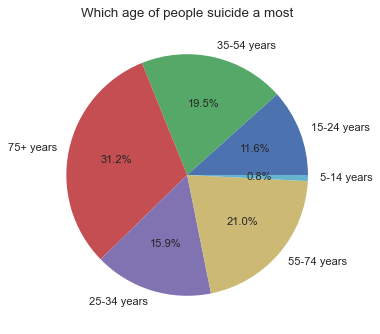

In [250]:
x=[i for i in AgeMean]
plt.figure(figsize=(10,5),dpi=80)
plt.pie(x,labels=[i for i in df.age.unique()],autopct='%1.1f%%')
plt.title('Which age of people suicide a most')
plt.show()

In [256]:
GenMean=[]
for i in (df.generation.unique()):
    new5=df[df['generation']==i]
    GenMean.append(new5['suicides/100k pop'].mean())
GenMean

[10.556874219725342,
 18.41884820867379,
 23.946377551020408,
 14.74209418837675,
 5.383596851471595,
 0.6422993197278911]

In [255]:
df.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

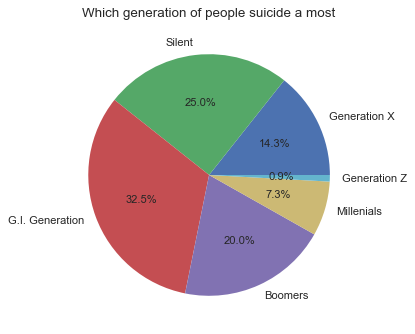

In [258]:
x=[i for i in GenMean]
plt.figure(figsize=(10,5),dpi=80)
plt.pie(x,labels=[i for i in df.generation.unique()],autopct='%1.1f%%')
plt.title('Which generation of people suicide a most')
plt.show()